<a href="https://colab.research.google.com/github/NIETOCAMBRON7/Simulacion-2/blob/main/Inventario_con_simpy___Nieto_Cambron_Daniel_Alejandro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inventario con simpy

## Alumno: Nieto Cambrón Daniel Alejandro

Se importan las bibliotecas necesarias: simpy, numpy y matplotlib.pyplot.


In [2]:
!pip install simpy
import simpy
import numpy as np
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Se define la función warehouse_run, que simula el funcionamiento del almacén.

Se encarga de manejar el inventario, el balance y las órdenes de reposición.

In [3]:
# Función principal que simula el funcionamiento del almacén
def warehouse_run(env, order_cutoff, order_target):
  global inventory, balance, num_ordered

  inventory = order_target
  balance = 0.0
  num_ordered = 0

  while True:
    interarrival = generate_interarrival()
    yield env.timeout(interarrival)
    balance -= inventory * 2 * interarrival
    demand = generate_demand()
    if demand < inventory:
      balance += 100 * demand
      inventory -= demand
      print('{:.2f} vendidos {}'.format(env.now, demand))
    else:
      balance += 100 * inventory
      inventory = 0
      print('{:.2f} vendidos {} (sin stock)'.format(env.now, inventory))
    if inventory < order_cutoff and num_ordered == 0:
      env.process(handle_order(env, order_target))


Se define la función handle_order, que procesa la orden de reposición de inventario. Esta función realiza el pedido, actualiza el inventario y el balance.

In [4]:
# Procesa la orden de reposición de inventario
def handle_order(env, order_target):
  global inventory, balance, num_ordered

  num_ordered = order_target - inventory
  print('{:.2f} se ha realizado un pedido de {}'.format(env.now, num_ordered))
  balance -= 50 * num_ordered
  yield env.timeout(2.0)
  inventory += num_ordered
  num_ordered = 0
  print('{:.2f} pedido recibido, {} en inventario'.format(env.now, inventory))

Se definen las funciones generate_interarrival y generate_demand, que generan los tiempos entre llegadas de pedidos y la demanda de productos, respectivamente, utilizando distribuciones aleatorias.

In [5]:

# Genera el tiempo entre llegadas de los pedidos
def generate_interarrival():
  return np.random.exponential(1.0 / 5)

# Genera la demanda de productos
def generate_demand():
  return np.random.randint(1, 5)



Se crean las variables obs_time e inventory_level para almacenar las observaciones del nivel de inventario a lo largo del tiempo.

In [7]:
# Variables para almacenar las observaciones del inventario a lo largo del tiempo
obs_time = []
inventory_level = []


Se define la función observe, que se encarga de observar el nivel de inventario en intervalos de tiempo y almacenar los datos en las variables mencionadas anteriormente.

In [8]:
# Observa el nivel de inventario en intervalos de tiempo
def observe(env):
  global inventory

  while True:
    obs_time.append(env.now)
    inventory_level.append(inventory)
    yield env.timeout(0.1)



Se establece una semilla aleatoria utilizando np.random.seed(0) para reproducibilidad de los resultados.

Se crea un entorno de simulación (simpy.Environment()).

Se inician dos procesos en paralelo en el entorno de simulación: warehouse_run(env, 25, 50) y observe(env).

Se ejecuta la simulación hasta un tiempo específico (env.run(until=5.0)).

Se visualiza el nivel de inventario a lo largo del tiempo utilizando matplotlib.pyplot.

0.16 vendidos 2
0.53 vendidos 4
0.69 vendidos 2
0.88 vendidos 3
1.00 vendidos 3
1.01 vendidos 1
1.11 vendidos 3
1.44 vendidos 3
1.61 vendidos 2
1.97 vendidos 1
1.99 vendidos 4
1.99 se ha realizado un pedido de 28
2.08 vendidos 2
2.38 vendidos 4
2.79 vendidos 4
3.11 vendidos 4
3.26 vendidos 4
3.28 vendidos 1
3.46 vendidos 2
3.99 pedido recibido, 29 en inventario
4.04 vendidos 4
4.06 vendidos 4
4.06 se ha realizado un pedido de 29
4.12 vendidos 4
4.39 vendidos 1
4.56 vendidos 1
4.63 vendidos 2
4.82 vendidos 1
4.92 vendidos 1


Text(0, 0.5, 'Nivel de inventario')

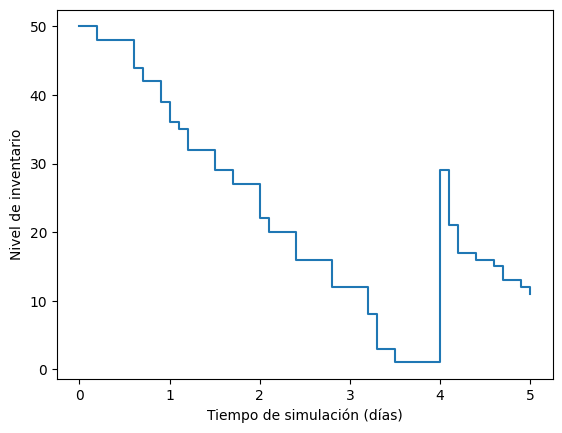

In [9]:
np.random.seed(0)

# Configuración del entorno de simulación
env = simpy.Environment()
env.process(warehouse_run(env, 25, 50))
env.process(observe(env))

# Ejecución de la simulación hasta un tiempo determinado
env.run(until=5.0)

# Visualización del nivel de inventario a lo largo del tiempo
plt.figure()
plt.step(obs_time, inventory_level, where='post')
plt.xlabel('Tiempo de simulación (días)')
plt.ylabel('Nivel de inventario')


En resumen, este código simula el funcionamiento de un almacén, generando llegadas de pedidos, demanda de productos, realizando órdenes de reposición y observando el nivel de inventario a lo largo del tiempo. Los resultados se representan gráficamente mediante un gráfico de nivel de inventario versus tiempo.

Espero que esta explicación general te sea útil. Si tienes alguna pregunta adicional, no dudes en hacerla.